   position         team  played        won     drawn       lost  goals_for  \
0         1    Barcelona      30  23.684211  4.736842   1.578947      0.095   
1         2  Real Madrid      30  22.894737  3.947368   3.157895      0.102   
2         3     Valencia      30  16.578947  6.315789   7.105263      0.064   
3         4   Villarreal      30  14.210526  6.315789   9.473684      0.054   
4         5      Sevilla      30  13.421053  5.526316  11.052632      0.062   

   goals_against  goal_difference     points  year  
0          0.021            0.074  84.210526  2010  
1          0.033            0.069  80.701754  2010  
2          0.044            0.020  62.280702  2010  
3          0.044            0.010  54.385965  2010  
4          0.061            0.001  50.877193  2010  
(240, 11)
position             int64
team                object
played               int64
won                float64
drawn              float64
lost               float64
goals_for          float64
goals_ag

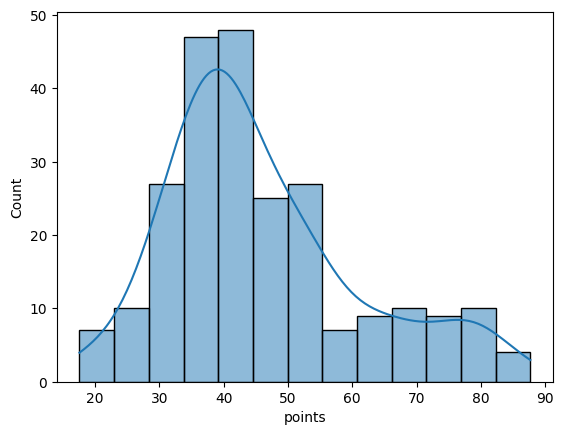

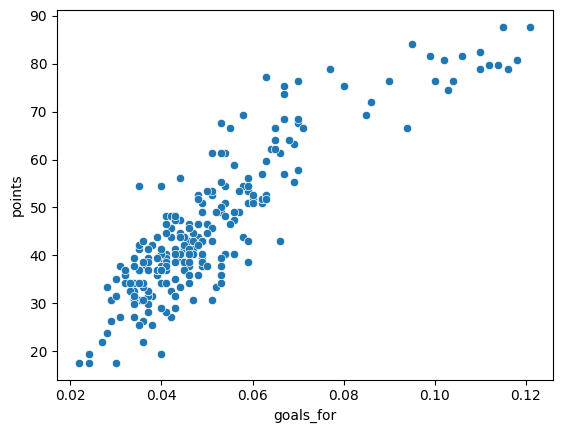

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

la_liga = pd.read_csv("../normalized_data/2010-2022.csv")




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()




In [2]:
mean_points= 41.10165662650602
stdev_points= 15.099800434416446

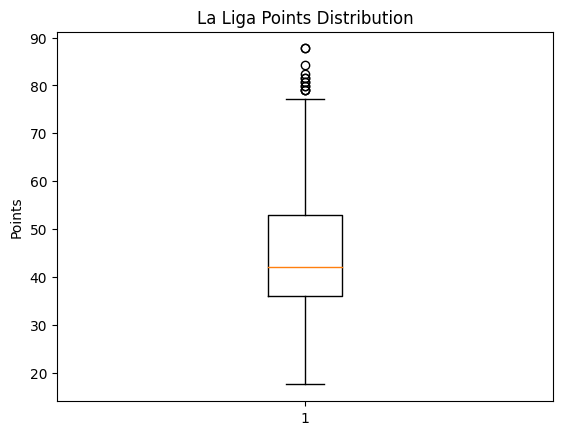

upper bound 78.1798245614035
lower bound 10.635964912280706
points upper 1221.6014055013882
points lower 201.7026042294003
Outliers:
     position             team  played        won     drawn      lost  \
0           1        Barcelona      30  23.684211  4.736842  1.578947   
1           2      Real Madrid      30  22.894737  3.947368  3.157895   
20          1      Real Madrid      30  25.263158  3.157895  1.578947   
21          2        Barcelona      30  22.105263  5.526316  2.368421   
40          1        Barcelona      30  25.263158  3.157895  1.578947   
60          1  Atlético Madrid      30  22.105263  4.736842  3.157895   
80          1        Barcelona      30  23.684211  3.157895  3.157895   
81          2      Real Madrid      30  23.684211  1.578947  4.736842   
100         1        Barcelona      30  22.894737  3.157895  3.947368   
101         2      Real Madrid      30  22.105263  4.736842  3.157895   
120         1      Real Madrid      30  22.894737  4.736842  2.3

In [3]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')


plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
print("upper bound",upper_bound)



lower_bound = q1 - 1.5*iqr
print("lower bound",lower_bound)
print("points upper",(upper_bound*stdev_points)+mean_points)
print("points lower",(lower_bound*stdev_points)+mean_points)



outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)



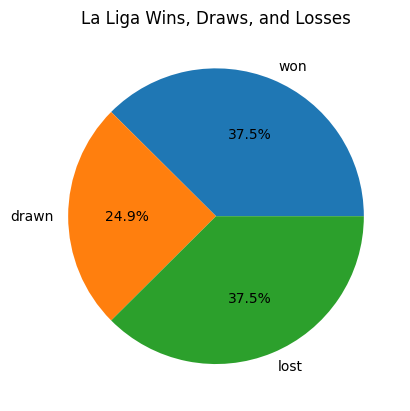

In [4]:
arr=[]
year1=2010
year2=2011
while(year1!=2022):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

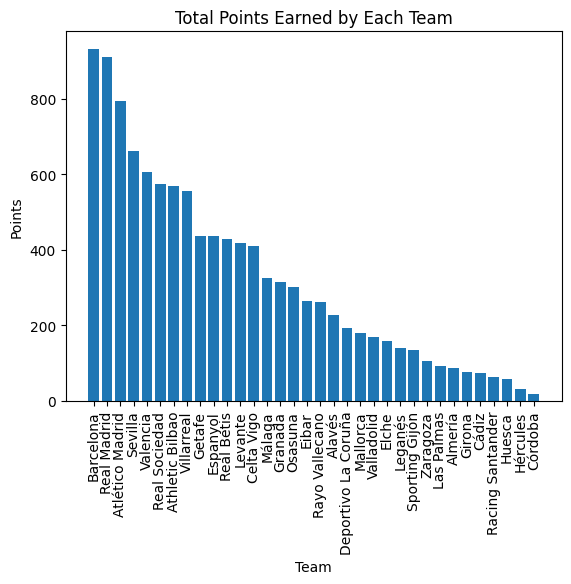

In [5]:
df=pd.read_csv("../normalized_data/2010-2022.csv")

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()


Text(0, 0.5, 'points')

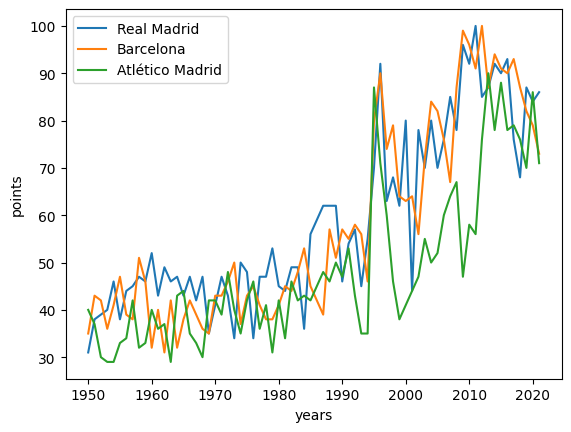

In [6]:
string="../teams/Real Madrid.csv"
data=pd.read_csv(string)
data= data[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]


string="../teams/Barcelona.csv"
data2=pd.read_csv(string)
data2= data2[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]
string="../teams/Atlético Madrid.csv"
data3=pd.read_csv(string)
data3= data3[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]


year=[]
for i in data['year']:
    year.append(int(i[0:4]))
year2=[]
for i in data2['year']:
    year2.append(int(i[0:4]))
year3=[]
for i in data3['year']:
    year3.append(int(i[0:4]))



  
plt.plot(year, data["points"], label=data["team"][0])
plt.plot(year2, data2["points"], label=data2["team"][0])
plt.plot(year3, data3["points"], label=data3["team"][0])
plt.legend()

plt.xticks(range(min(year), max(year)+1, 10))
plt.xlabel("years")
plt.ylabel("points")